In [27]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#Reading data as a dataframe

dataframe=pd.read_excel('/content/test_DataScience.xlsx')
dataframe.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,NaN,NaN,56892,17178
1,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,NaN,NaN,41460,11916
2,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Dehradun,NaN,NaN,55561,19461
3,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Indore,NaN,NaN,320923,110667
4,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,220937,46033


## **Part 0 - Reading the data**

In [61]:
#Printing each column with its datatype
dataframe.dtypes

Year                    int64
Month                  object
Laptop/Desktop         object
Type_of_Customers?     object
Coming from            object
Place_in_India         object
Level 1               float64
Level 2               float64
Level 3                 int64
Level 4                 int64
dtype: object

In [62]:
# Various locations from which the page was accessed

print(dataframe['Place_in_India'].unique())

['Bengaluru' 'Hyderabad' 'Dehradun' 'Indore' 'Pune']


## **Part 1 - Data Cleaning**




In [63]:
dataframe.isna().sum()

Year                     0
Month                    0
Laptop/Desktop           0
Type_of_Customers?       0
Coming from              0
Place_in_India           0
Level 1               1079
Level 2               1079
Level 3                  0
Level 4                  0
dtype: int64

In [64]:
dataframe.describe()

,Year,Level 1,Level 2,Level 3,Level 4
count,2160.000000,1.081000e+03,1.081000e+03,2.160000e+03,2.160000e+03
mean,2021.000000,7.838702e+05,3.582154e+05,1.510725e+05,5.922129e+04
std,0.816686,1.232119e+06,4.979654e+05,2.353539e+05,8.646564e+04
min,2020.000000,2.456700e+04,8.425000e+03,3.761000e+03,7.660000e+02
25%,2020.000000,1.385690e+05,8.067200e+04,3.360800e+04,1.157725e+04
50%,2021.000000,3.814640e+05,1.729130e+05,7.064950e+04,2.700450e+04
75%,2022.000000,8.158770e+05,3.940300e+05,1.659590e+05,7.185350e+04
max,2022.000000,1.127413e+07,4.079301e+06,3.022858e+06,1.251258e+06


In [65]:
from datetime import datetime as dt

In [66]:
# Function for cleaning data by adding a new feature for date and converting it in the required format

def data_cleaning(df):
  dict1={'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
  df.loc[:,'Month'].replace(dict1, inplace=True)
  df.insert(2,'Month_Year',"01-"+df['Month']+"-"+df['Year'].astype(str))
  df['Month_Year']= pd.to_datetime(df['Month_Year']).apply(lambda x: dt.strftime(x,'%d-%m-%Y'))
  #df['Month_Year']= pd.to_datetime(df['Month_Year'], dayfirst=True)
  
  df.loc[:,'Level 1']=df.loc[:,'Level 1'].fillna(df.loc[:,'Level 1'].mean())
  df.loc[:,'Level 2']=df.loc[:,'Level 2'].fillna(df.loc[:,'Level 2'].mean())
  df.loc[:,'Coming from'].replace({'Came_From_LinkedIn':'LinkedIn','Landed_Directly':'Direct_Traffic'},inplace=True)
  return df

In [67]:
dataframe=data_cleaning(dataframe)
dataframe.head()

,Year,Month,Month_Year,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,01,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178
1,2020,01,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916
2,2020,01,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461
3,2020,01,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Indore,783870.222017,358215.416281,320923,110667
4,2020,01,01-01-2020,Desktop_Website,Existing_Customer,LinkedIn,Pune,783870.222017,358215.416281,220937,46033


## Write a brief paragraph about what you think about this dataset along the lines of :
###▪	which geo-location this dataset belongs to? 

Ans. This dataset belongs to the Indian region as suggested by the Place_in_India feature.

###▪	Given that this dataset is for a website like Flipkart, what could be the possible definitions of the columns Level 1, 2, 3, 4 in the given dataset?

Ans. The levels could be points/scores associated to each customer. Level 1 is the highest and level 4 is the lowest.

## **Part 2 - Descriptive statistics**


In [73]:
# Function to print descriptive statistics

def descriptive_stats(df,Year=2020,Month='01',Laptop_Desktop='Desktop_Website',Type_of_Customers='Existing_Customer',Coming_from='LinkedIn',Place_in_India='Bengaluru'):
  
  #Filtering based on parameter
  df= df[(df['Year']==Year) & (df['Month']==Month) & (df['Laptop/Desktop']==Laptop_Desktop) & (df['Type_of_Customers?']==Type_of_Customers) & (df['Coming from']== Coming_from)& (df['Place_in_India']== Place_in_India)]
  print('Descriptive Statistics Table')
  print("\n")
  print(df.describe())
  print("\n")
  cols=df.columns

  for col in cols[0:-4]:
    print(col,":", df[col].unique())
    print('Datatype:', df[col].dtypes)
    print("\n")

In [74]:
descriptive_stats(dataframe)

Descriptive Statistics Table


         Year        Level 1        Level 2  Level 3  Level 4
count     1.0       1.000000       1.000000      1.0      1.0
mean   2020.0  783870.222017  358215.416281  56892.0  17178.0
std       NaN            NaN            NaN      NaN      NaN
min    2020.0  783870.222017  358215.416281  56892.0  17178.0
25%    2020.0  783870.222017  358215.416281  56892.0  17178.0
50%    2020.0  783870.222017  358215.416281  56892.0  17178.0
75%    2020.0  783870.222017  358215.416281  56892.0  17178.0
max    2020.0  783870.222017  358215.416281  56892.0  17178.0


Year : [2020]
Datatype: int64


Month : ['01']
Datatype: object


Month_Year : ['01-01-2020']
Datatype: object


Laptop/Desktop : ['Desktop_Website']
Datatype: object


Type_of_Customers? : ['Existing_Customer']
Datatype: object


Coming from : ['LinkedIn']
Datatype: object


Place_in_India : ['Bengaluru']
Datatype: object




#### ***Note -  If each categorical feature is filtered, only one sample would be found in the dataset, which can be witnessed in the above example.***

In [77]:
# Function to print descriptive statistics for all the years

def descriptive_stats2(df,Laptop_Desktop='Desktop_Website',Type_of_Customers='Existing_Customer',Coming_from='LinkedIn',Place_in_India='Bengaluru'):
  
  #Filtering based on parameter
  df= df[(df['Laptop/Desktop']==Laptop_Desktop) & (df['Type_of_Customers?']==Type_of_Customers) & (df['Coming from']== Coming_from)& (df['Place_in_India']== Place_in_India)]
  print('Descriptive Statistics Table')
  print("\n")
  print(df.describe())
  print("\n")
  cols=df.columns

  for col in cols[0:-4]:
    print(col,":", df[col].unique())
    print('Datatype:', df[col].dtypes)
    print("\n")

In [78]:
descriptive_stats2(dataframe)

Descriptive Statistics Table


              Year        Level 1       Level 2       Level 3       Level 4
count    36.000000      36.000000  3.600000e+01     36.000000     36.000000
mean   2021.000000  783870.222017  3.582154e+05  45333.333333  14362.166667
std       0.828079       0.000000  5.903334e-11  14483.018764   3739.466199
min    2020.000000  783870.222017  3.582154e+05  22206.000000   7828.000000
25%    2020.000000  783870.222017  3.582154e+05  33763.000000  11894.750000
50%    2021.000000  783870.222017  3.582154e+05  46851.000000  14834.500000
75%    2022.000000  783870.222017  3.582154e+05  53924.250000  16331.000000
max    2022.000000  783870.222017  3.582154e+05  75855.000000  24066.000000


Year : [2020 2021 2022]
Datatype: int64


Month : ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']
Datatype: object


Month_Year : ['01-01-2020' '02-01-2020' '03-01-2020' '04-01-2020' '05-01-2020'
 '06-01-2020' '07-01-2020' '08-01-2020' '09-01-2020' '10-01-2020'
 '11-01

## **Part 3- Prescriptive statistics**

In [38]:
# To find top 3 cities in the years 2021 and 2022 based on Level 1

new_df= dataframe[['Year','Place_in_India','Level 1']]
new_df_filtered= new_df[(dataframe['Year']==2021) | (dataframe['Year'] == 2022)]
new_df_agg= new_df_filtered.groupby(['Year','Place_in_India'])['Level 1'].sum()
new_df_agg = new_df_agg.groupby('Year',group_keys=False)

result_top3 = new_df_agg.apply(lambda x: x.sort_values(ascending=False).head(3))
result_df_top3=pd.DataFrame(result_top3)
result_df_top3['Level 1'].round(0)

Year  Place_in_India
2021  Pune              184505782.0
      Indore            152372366.0
      Hyderabad         104632560.0
2022  Pune              188767447.0
      Indore            167650167.0
      Hyderabad         118389793.0
Name: Level 1, dtype: float64

In [39]:
# Computation for all the cities

new_df= dataframe[['Year','Place_in_India','Level 1','Level 2','Level 3','Level 4']]
new_df_agg= new_df.groupby(['Place_in_India','Year'])[['Level 1','Level 2','Level 3','Level 4']].sum()

new_df_agg['(sum of level 2) / (sum of level 1)']=new_df_agg['Level 2']/new_df_agg['Level 1']
new_df_agg['(sum of level 3) / (sum of level 1)']=new_df_agg['Level 3']/new_df_agg['Level 1']
new_df_agg['(sum of level 4) / (sum of level 1)']=new_df_agg['Level 4']/new_df_agg['Level 1']

new_df_agg.drop(['Level 1','Level 2','Level 3','Level 4'], axis=1, inplace=True)

new_df_agg

(sum of level 2) / (sum of level 1)  \
Place_in_India Year                                        
Bengaluru      2020                             0.488079   
               2021                             0.453393   
               2022                             0.441282   
Dehradun       2020                             0.483189   
               2021                             0.436285   
               2022                             0.419564   
Hyderabad      2020                             0.501703   
               2021                             0.439948   
               2022                             0.457508   
Indore         2020                             0.585207   
               2021                             0.461700   
               2022                             0.499384   
Pune           2020                             0.502248   
               2021                             0.363878   
               2022                             0.390387   

                     (sum of level 3) / (sum of level 1)  \
Place_in_India Year                                        
Bengaluru      2020                             0.109296   
               2021                             0.090450   
               2022                             0.101524   
Dehradun       2020                             0.101910   
               2021                             0.081112   
               2022                             0.102348   
Hyderabad      2020                             0.136220   
               2021                             0.148135   
               2022                             0.206666   
Indore         2020                             0.321899   
               2021                             0.258978   
               2022                             0.313373   
Pune           2020                             0.266550   
               2021                             0.164717   
               2022                             0.191877   

                     (sum of level 4) / (sum of level 1)  
Place_in_India Year                                       
Bengaluru      2020                             0.046336  
               2021                             0.042744  
               2022                             0.048503  
Dehradun       2020                             0.049106  
               2021                             0.031764  
               2022                             0.033521  
Hyderabad      2020                             0.065812  
               2021                             0.074894  
               2022                             0.069364  
Indore         2020                             0.152649  
               2021                             0.115071  
               2022                             0.090095  
Pune           2020                             0.096418  
               2021                             0.069406  
               2022                             0.059378

In [40]:
# To find bottom 3 cities for all the years based on Level 4

new_df= dataframe[['Year','Place_in_India','Level 4']]
new_df_filtered= new_df[(dataframe['Year']==2021) | (dataframe['Year'] == 2022)]
new_df_agg= new_df_filtered.groupby(['Year','Place_in_India'])['Level 4'].sum()
new_df_agg = new_df_agg.groupby('Year',group_keys=False)
result_bot3=new_df_agg.apply(lambda x: x.sort_values().head(3))

result_df_bot3=pd.DataFrame(result_bot3)
result_df_bot3['Level 4'].round(0)

Year  Place_in_India
2021  Dehradun          2445091
      Bengaluru         3140030
      Hyderabad         7836311
2022  Dehradun          2673864
      Bengaluru         3752706
      Hyderabad         8211936
Name: Level 4, dtype: int64

## **Part 4 - Simple Machine learning questions**

Referred the following link to write the code for time series model

https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/

In [41]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error

In [42]:
!pip install pmdarima
  
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
# To check if data is stationary or not

def adfuller_test(time_series):
  result = adfuller(time_series)
  print ('ADF Test:')
  labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

  for value,label in zip(result,labels):
      print (label+' : '+str(value))
  if result[1] <= 0.05:
      print ("Reject null hypothesis, data is stationary.")
  else:
      print ("Failed to reject null hypothesis, data is non-stationary.")

In [55]:
# Forecast future sales

def predict_future(df,Laptop_Desktop='Desktop_Website',Type_of_Customers='Existing_Customer',Coming_from='LinkedIn',Place_in_India='Bengaluru'):

  df=df[(df['Laptop/Desktop']==Laptop_Desktop) & (df['Type_of_Customers?']==Type_of_Customers) & (df['Coming from']== Coming_from)& (df['Place_in_India']== Place_in_India)][['Month_Year','Level 4']]
  df['Month_Year']= df['Month_Year'].astype('datetime64[ns]')
  df.set_index('Month_Year',inplace=True)
  figure=plt.figure()
  figure.set_size_inches(15, 8)
  df.plot()
  plt.title('Level 4 values')
  plt.show()


  print('\n Dickey Fuller test results:')
  adfuller_test(df['Level 4'])

  print('\n Decompostion Plot')  
  decomposition = seasonal_decompose(np.log(df['Level 4']), period=6)  
  figure1 = plt.figure()  
  figure1 = decomposition.plot()  
  figure1.set_size_inches(35, 25)
  plt.show()

  train=df[0:25]
  test=df[25:36]

  pred_start=test.index[0]
  pred_end=test.index[-1]

      
  # Fit auto_arima function to dataset
  auto_arima_fit = auto_arima(df['Level 4'], start_p = 1, start_q = 1,
                              max_p = 3, max_q = 3, m = 12,
                              start_P = 0, seasonal = True,
                              d = None, D = 1, trace = True,
                              error_action ='ignore',  
                              suppress_warnings = True,  
                              stepwise = True)          
      
  # To print the summary
  auto_arima_fit.summary()
    
  model_SARIMA=SARIMAX(train['Level 4'],order=(1,0,0),seasonal_order=(2,1,0,12))

  model_SARIMA_fit=model_SARIMA.fit()
  model_SARIMA_fit.summary()

  pred_Sarima=model_SARIMA_fit.predict(start=pred_start,end=pred_end)
  test.loc[:,'Predicted_SARIMA']=pred_Sarima

  print('Forecast error: ', mean_absolute_error(test['Level 4'],test['Predicted_SARIMA']))
  print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(test['Level 4'],test['Predicted_SARIMA']))
  print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test['Level 4'],test['Predicted_SARIMA'])))

 

  figure2 = plt.figure() 
  figure2= test[['Level 4','Predicted_SARIMA']].plot()
  plt.title('Original vs Predicted')
  plt.show()

  forecast = model_SARIMA_fit.predict(start =len(df), 
                            end = len(df)-1+12, 
                            typ = 'levels').rename('Forecast')
    
  # Plot the forecast values

  df['Level 4'].plot(figsize = (12, 5), legend = True)
  forecast.plot(legend = True)
  plt.title('Forecasted Level 4 values for 2023')
  plt.show()




    



<Figure size 1080x576 with 0 Axes>

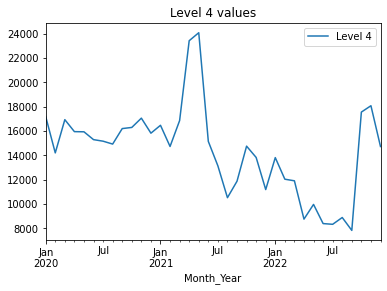


 Dickey Fuller test results:
ADF Test:
ADF Statistic : -2.5816007879226697
p-value : 0.09685994893840855
No. of Lags Used : 0
Number of Observations Used : 35
Failed to reject null hypothesis, data is non-stationary.

 Decompostion Plot


<Figure size 432x288 with 0 Axes>

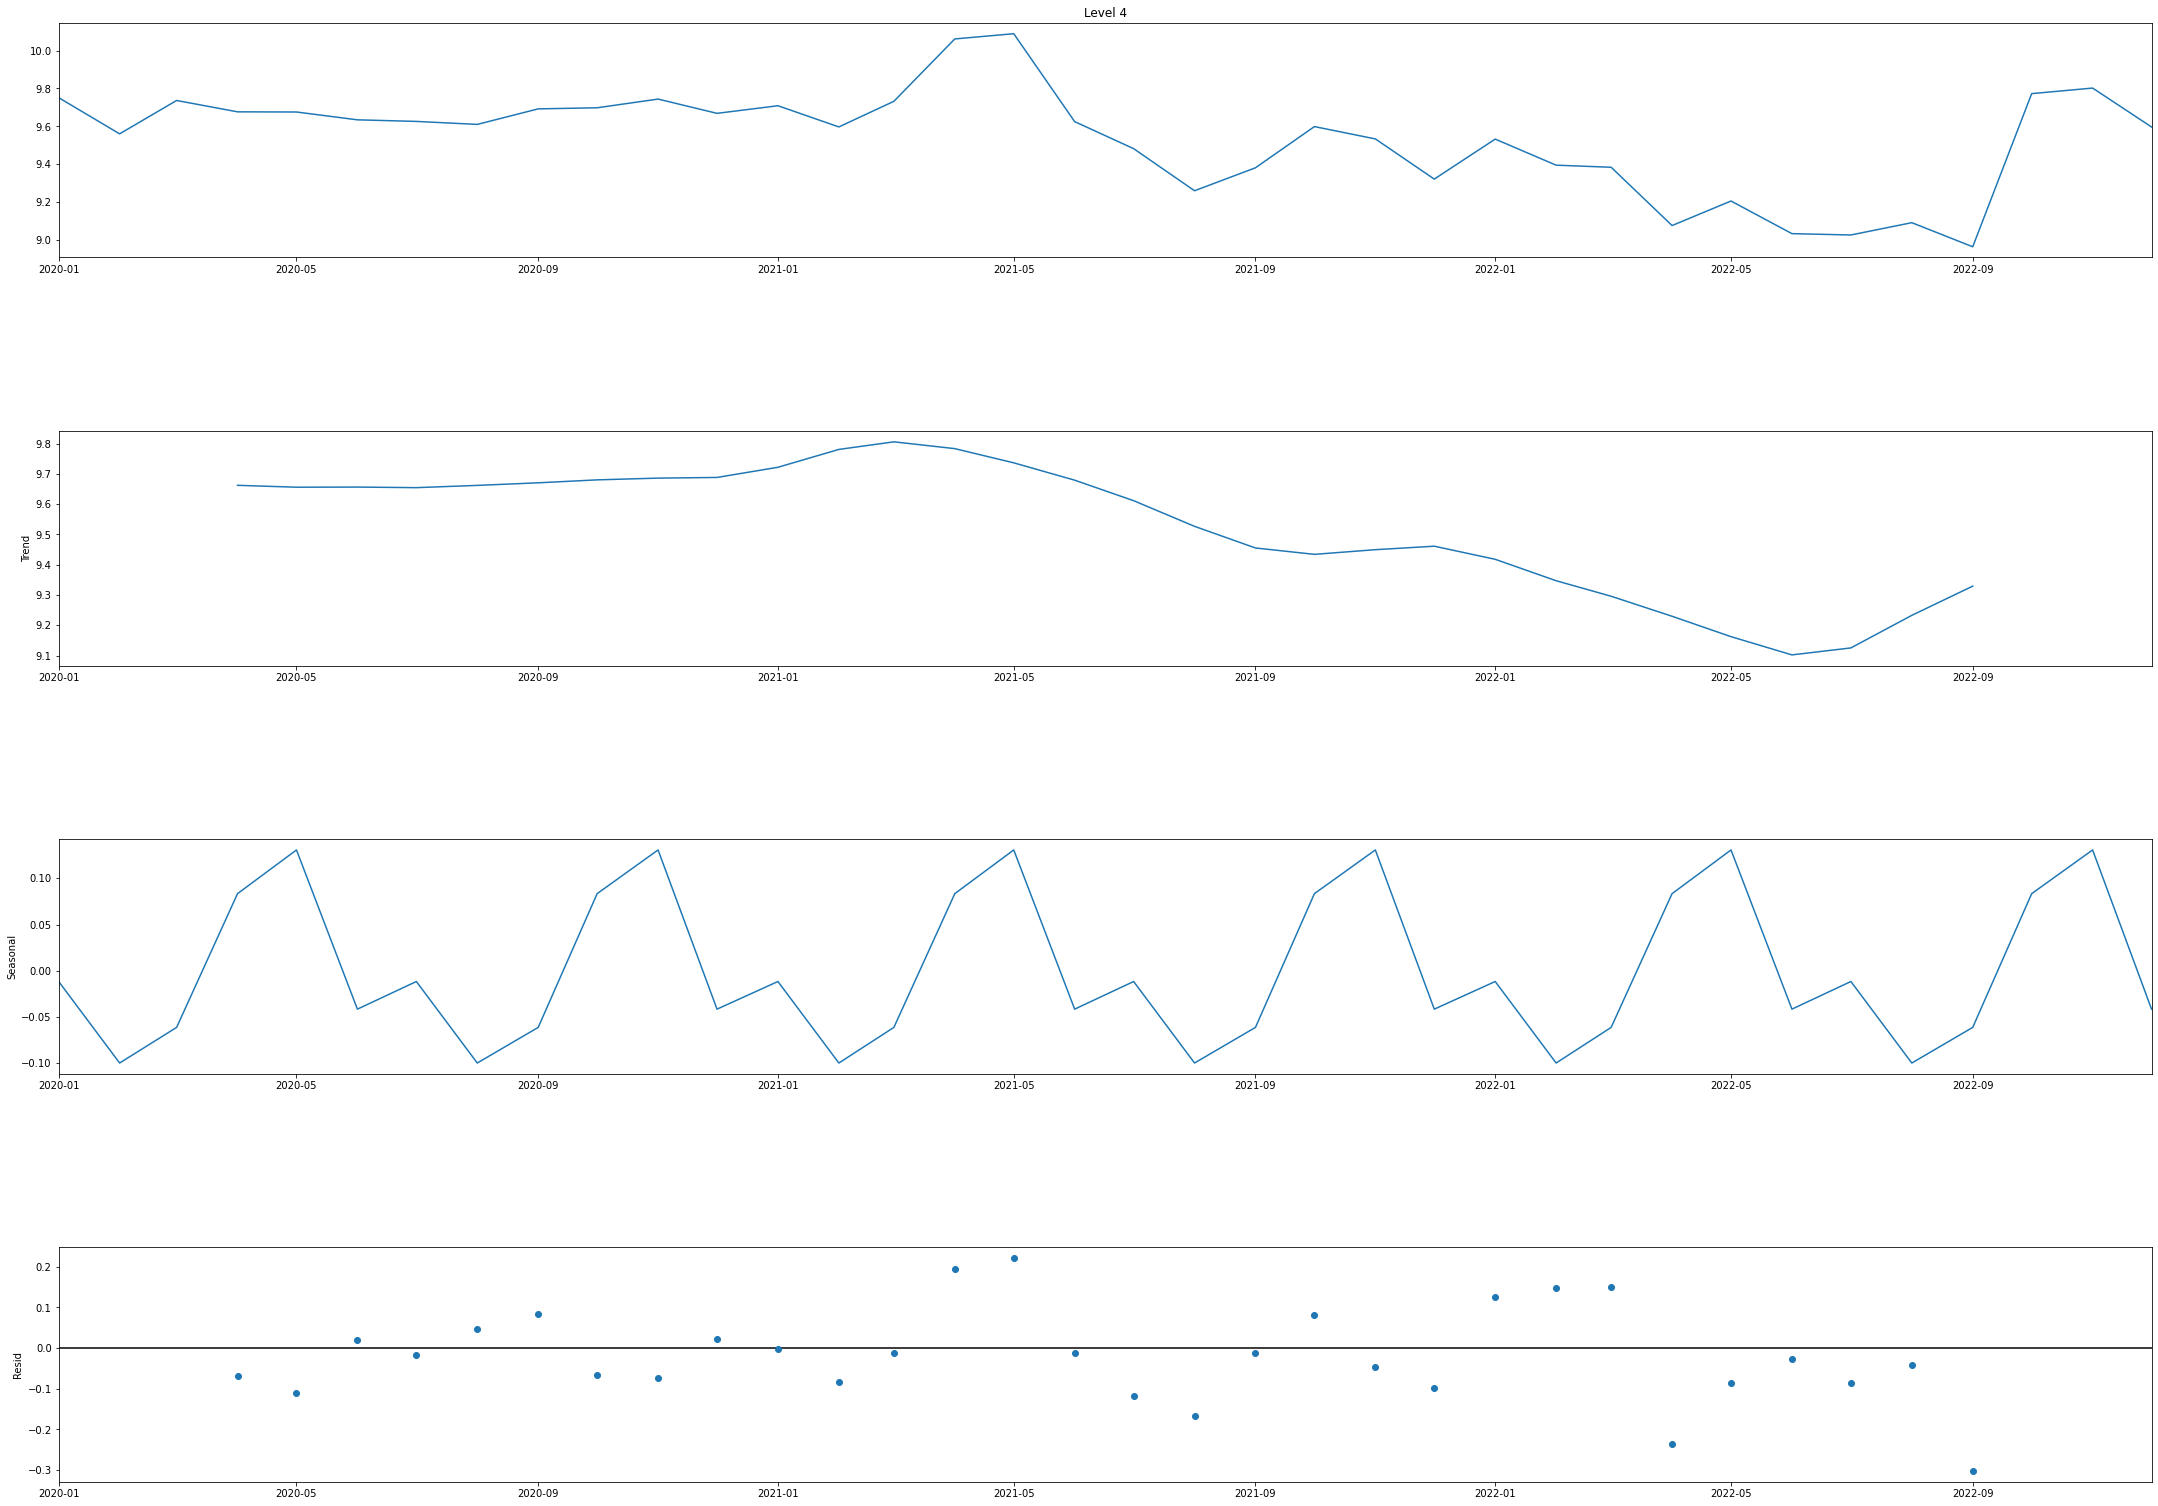

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=474.583, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=483.613, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=471.746, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=476.352, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=485.185, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=475.489, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=472.861, Time=0.29 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=473.386, Time=0.17 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=474.023, Time=0.57 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=485.541, Time=0.05 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=474.258, Time=0.14 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=474.443, Time=0.17 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=476.457, Time=0.15 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   

<Figure size 432x288 with 0 Axes>

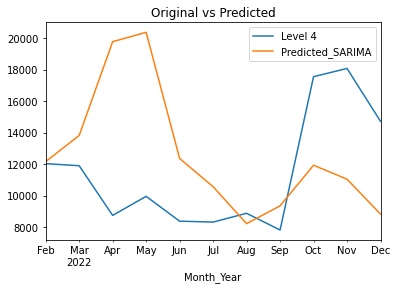

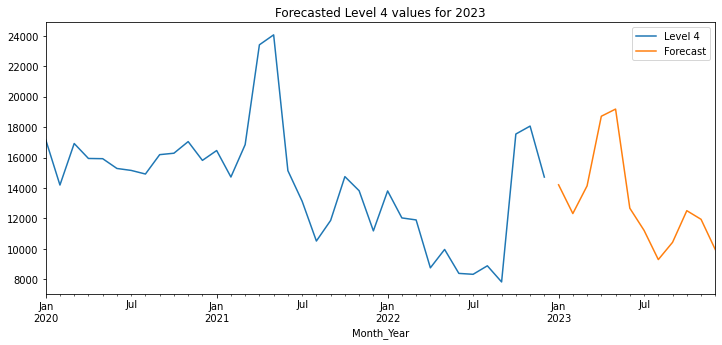

In [56]:
predict_future(dataframe,'Desktop_Website','Existing_Customer','LinkedIn','Bengaluru')

## **Part 5 - Visualization**

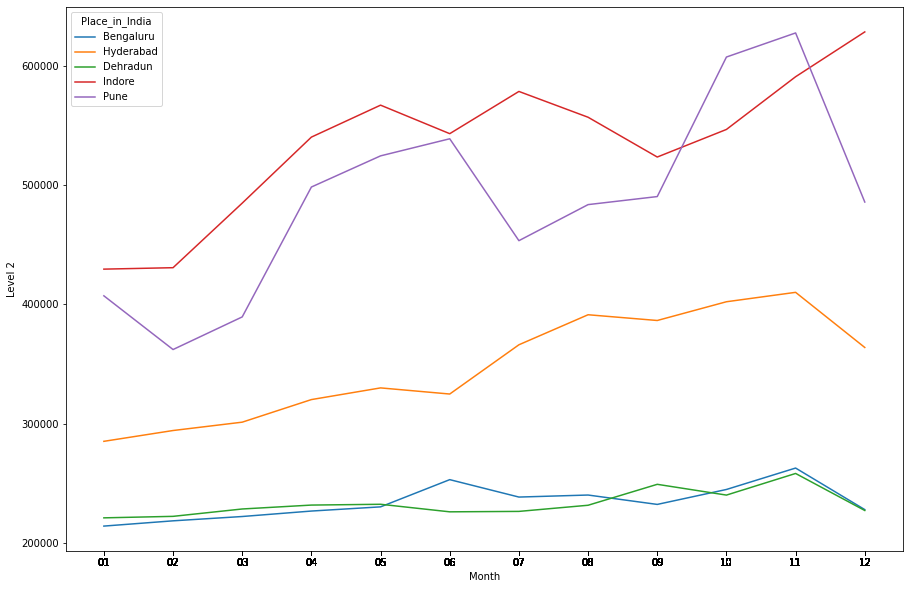

In [46]:
data=dataframe[(dataframe["Year"]==2021) | (dataframe["Year"] == 2022)]

plt.figure(figsize=(15,10))
a= sns.lineplot(data=data,x='Month',y='Level 2',hue='Place_in_India',ci=None)
a.set(xticks=data['Month'])
plt.show()

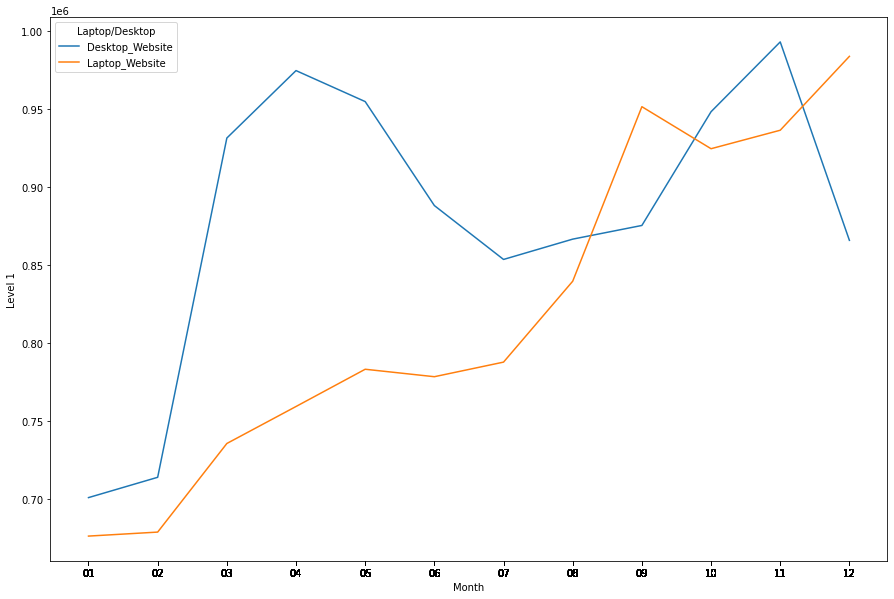

In [47]:
plt.figure(figsize=(15,10))
a=sns.lineplot(data=data,x='Month',y='Level 1',hue='Laptop/Desktop',ci=None)
a.set(xticks=data['Month'])
plt.show()

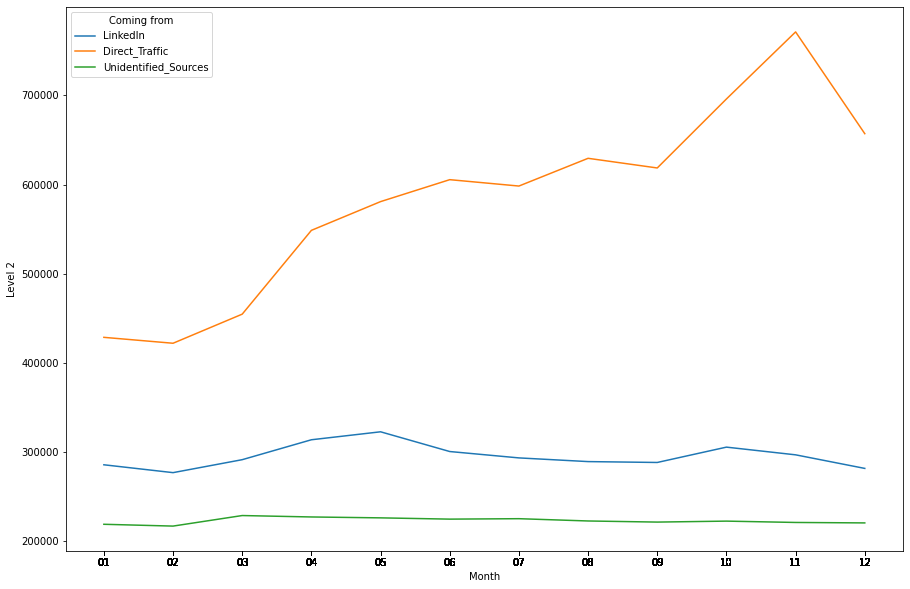

In [48]:
plt.figure(figsize=(15,10))
a= sns.lineplot(data=data,x='Month',y='Level 2',hue='Coming from',ci=None)
a.set(xticks=data['Month'])
plt.show()

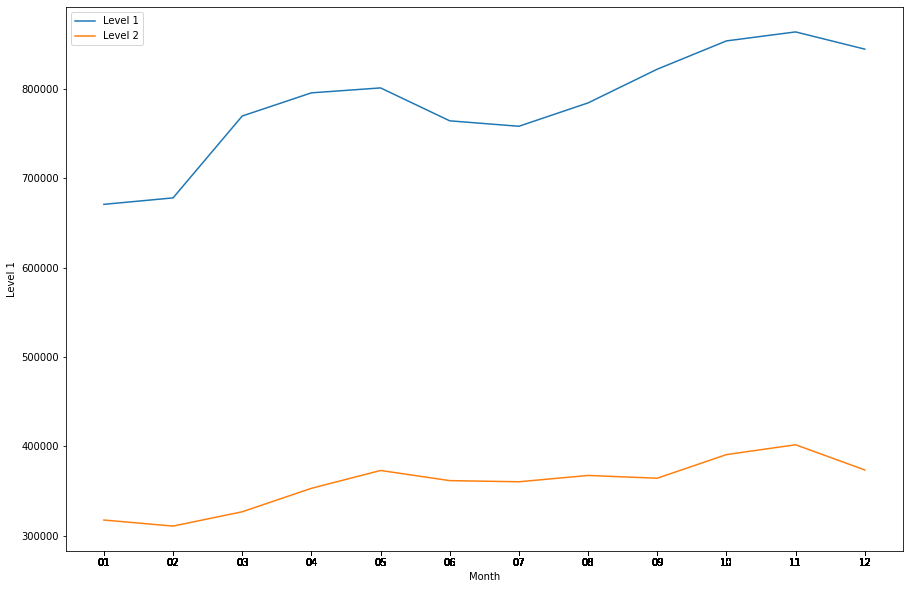

In [49]:
plt.figure(figsize=(15,10))
a= sns.lineplot(data=dataframe,x='Month',y='Level 1',label='Level 1',ci=None)
b=sns.lineplot(data=dataframe,x='Month',y='Level 2',label='Level 2',ci=None)
a.set(xticks=data['Month'])
plt.show()

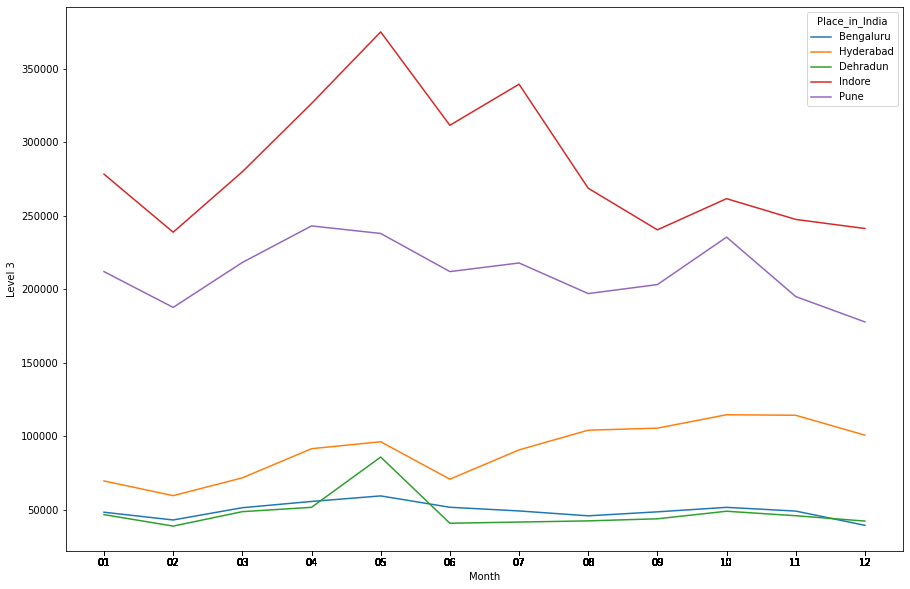

In [50]:
data2=dataframe[(dataframe["Year"]==2020) | (dataframe["Year"] == 2021)]

plt.figure(figsize=(15,10))
a= sns.lineplot(data=data2,x='Month',y='Level 3',hue='Place_in_India',ci=None)
a.set(xticks=data2['Month'])
plt.show()

#### 1. Customers accessing the website/app from Indore have the highest Level 1 and Level 3 scores.

#### 2. In the months of April, May and November, the level 1 and Level 2 scores increase.

#### 3. Customers accessing the site directly have the highest level 2 score.

### **Part 6: About the Previous projects**
####●	Please describe any interesting project you did in the Data Science domain in more than 250 words. Attach Github links if possible. 


In my final year of engineering, the Alumni Cell of my university arranged an alumni mentorship programme where some university seniors conducted sessions on the basics of Machine Learning. It was at the time when COVID was at its peak. Hence, the sessions were conducted online.

It was a 2-week course, and at the end of it, each participant had to work on a Machine Learning project and share their results. I chose to learn more about Natural Language Processing as I found it interesting because of its real-life applications. For my project, I worked on the sentiment analysis of restaurant reviews. This was my first Machine Learning project. I implemented various data processing steps, applied two classification algorithms – Logistic Regression and Naïve Bayes – to classify the sentiments (positive and negative), and tuned the hyperparameters to get the best results.

Besides the project mentioned above, I have also worked with Business Intelligence tools such as Power BI to create interactive and dynamic dashboards. One of the dashboards that I designed was an inventory dashboard to help clients manage and monitor the devices on their site at a single glance. It presented important KPIs such as the number of upgrades issued in a month, the number of devices not applicable for the upgrade, the success rate of the upgrades, etc. The first step in building this dashboard was to clean the data and create new features that could be more insightful than the original features. After this step, various visualisations were added to highlight the KPIs and trends.

Another data analytics project I have worked on is the analysis of the Superstore sales dataset. I performed exploratory data analysis and presented some inferences.

You can find the project description at the following links-
1.	Sentiment Analysis of Restaurant Reviews -https://github.com/hridayav99/Sentiment_Analysis_of_Restaurant_Reviews

2.	Superstore Sales Analysis- https://github.com/hridayav99/Superstore-Analysis



### **Part 7: Time management**
#### ●	Can you please share your thoughts, in less than 120 words, on “If you get selected, how will you manage your time for this full-time internship opportunity”

Ans. If I get selected for this internship, time management will be one of the crucial aspects I will have to consider. I would start by analysing each task assigned to me and allocate time based on the task's difficulty.  